# Linear Regression Example

In [1]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy
from sklearn.metrics import mean_squared_error

## Read file in pandas `DataFrame`

In [2]:
sf = pandas.read_csv('final_data.csv')

## Drop unwanted features

In [3]:
sf.drop(sf.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
sf.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue
0,Address: 1160 Mission Street #2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,"975,700"
1,Address: 260 King Street #475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,"975,700"
2,Address: 560 Missouri Street #B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,"1,277,600"
3,Address: 350 Missouri Street,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,"1,277,600"
4,Address: 3658 Folsom Street,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,"1,248,000"


## Analyze Linear correlation with house prices

In [4]:
sf.corr()['lastsoldprice']

bathrooms        0.536880
bedrooms         0.395478
finishedsqft     0.647208
lastsoldprice    1.000000
latitude         0.283107
longitude       -0.052595
totalrooms       0.093527
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

## Pick top correlated values for simplicity

In [5]:
X = sf[['finishedsqft']]
Y = sf['lastsoldprice']
X.head()

,finishedsqft
0,1043.0
1,903.0
2,1425.0
3,2231.0
4,1300.0


## Split into training and test data set
`X` represent features, `y` represents labels. Take 30% random samples as test samples for verification.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## Train the model

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Model: Coefficient: {} Intercept: {}'.format(regressor.coef_, regressor.intercept_))

Model: Coefficient: [734.35428034] Intercept: 106657.58669500821


/usr/local/Cellar/python/3.6.4_4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


## Test the model

In [8]:
y_pred = regressor.predict(X_test)

In [9]:
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = numpy.sqrt(lin_mse)
print('Liner Regression RMSE: {:,.2f}'.format(lin_rmse))

Liner Regression RMSE: 697,378.93


## Plot Regression Results

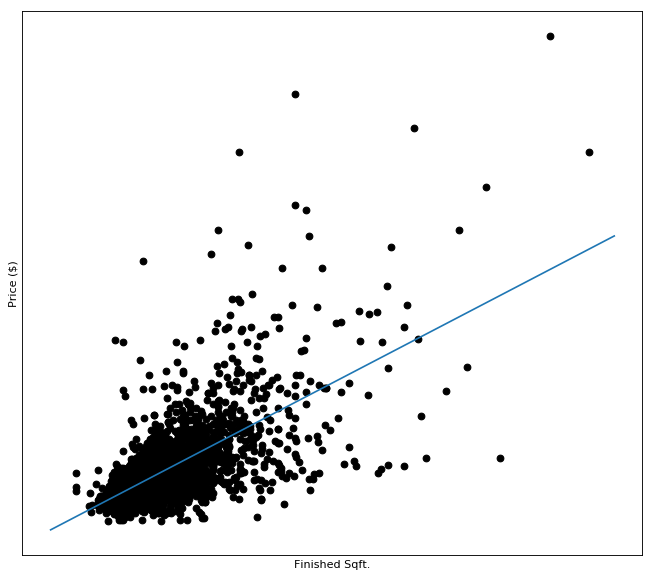

In [12]:
# Comment the following line out when running outside Jupyter
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X_test['finishedsqft'], y_test,  color='black')
plt.xlabel('Finished Sqft.')
plt.xticks(numpy.arange(100, 2000, step=100))
plt.ylabel('Price ($)')

axes = plt.gca()
x_vals = numpy.array(axes.get_xlim())
y_vals = regressor.coef_[0] * x_vals + regressor.intercept_
plt.plot(x_vals, y_vals, '-')

plt.xticks(())
plt.yticks(())

plt.show()

## Run the model
In this simple case, we can just call `regressor.predict(X)` where X is a vector of bathrooms and finished sqft.

In [11]:
prediction = regressor.predict(numpy.array([[900]]))
print('Predicted price is ${:,.2f}'.format(prediction[0]))

Predicted price is $767,576.44
